In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [108]:
df = pd.read_csv('/content/gdrive/MyDrive/ISLR_data/Default.csv')

In [109]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [110]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [111]:
df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


Text(0.5, 1.0, 'Box plot of balance')

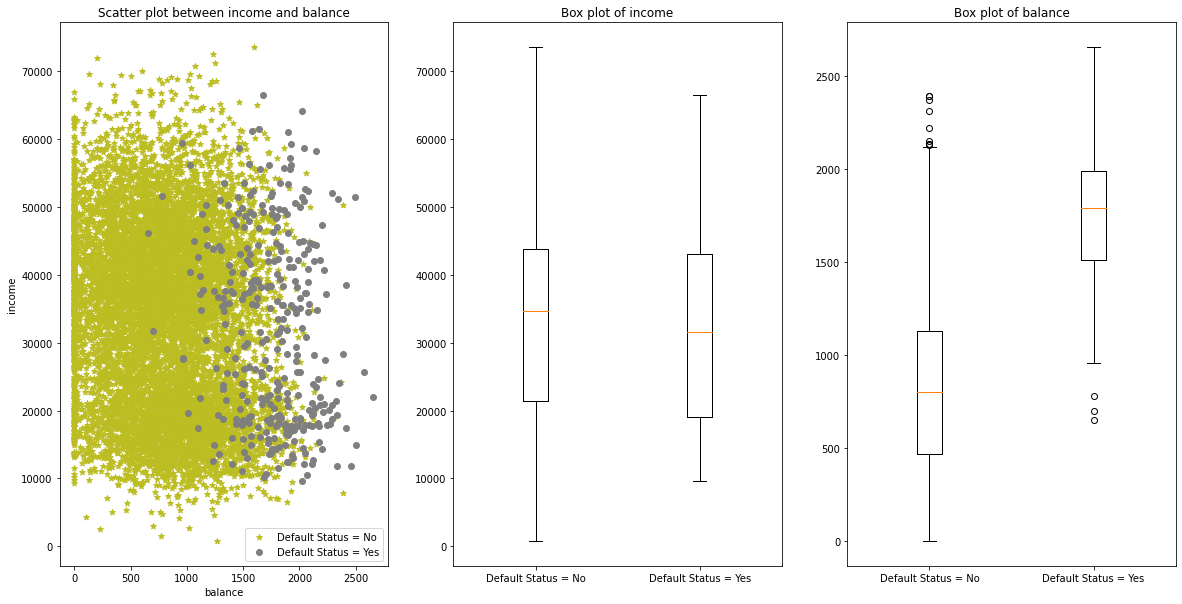

In [113]:
plt.subplots(1,3, figsize=(20, 10))

plt.subplot(1,3,1)
df_yes = df[df['default'] == 'Yes']
df_no = df[df['default'] == 'No']
plt.scatter(df_no['balance'], df_no['income'], c = '#bcbd22', marker='*', label='Default Status = No')
plt.scatter(df_yes['balance'], df_yes['income'], c = '#7f7f7f', label='Default Status = Yes')
plt.xlabel('balance')
plt.ylabel('income')
plt.title('Scatter plot between income and balance')
plt.legend()

plt.subplot(1,3,2)
plt.boxplot([df_no['income'], df_yes['income']])
plt.xticks([1, 2], ['Default Status = No', 'Default Status = Yes'])
plt.title('Box plot of income')

plt.subplot(1,3,3)
plt.boxplot([df_no['balance'], df_yes['balance']])
plt.xticks([1, 2], ['Default Status = No', 'Default Status = Yes'])
plt.title('Box plot of balance')

* จาก scatter plot จะเห็นว่า ทั้ง 2 class มีจำนวนแตกต่างกันอย่างมาก (Imbalance dataset)
* จาก box plot ของ income จะพบว่า data ส่วนใหญ่จะเกาะกลุ่มในบริเวณเดียวกัน ทั้งสอง class แต่ จาก box plot ของ balance จะพบว่า data ในแต่ละ class ส่วนใหญ่จะอยู่บริเวณที่แตกต่างกัน

In [7]:
df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [96]:
df = pd.read_csv('/content/gdrive/MyDrive/ISLR_data/Default.csv')
df = df.replace(to_replace=["Yes","No"],value=[1,0])
df_train = df[:7000]
df_test = df[7000:]
X_train = df_train[['student','balance', 'income']]
y_train = df_train['default']
X_test = df_test[['student','balance', 'income']]
y_test = df_test['default']

#Logistic Regression

In [91]:
X_train = sm.add_constant(X_train)
log_reg_all = sm.Logit(y_train, X_train).fit()
print(log_reg_all.summary())
X_test = sm.add_constant(df_test[['student', 'balance', 'income']])
X_test = sm.add_constant(X_test)
y_pred_all_1 = log_reg_all.predict(X_test)
X_train = df_train[['balance', 'income']]
X_train = sm.add_constant(X_train)
log_reg_2 = sm.Logit(y_train, X_train).fit()
#print(log_reg_2.summary())

Optimization terminated successfully.
         Current function value: 0.079240
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6996
Method:                           MLE   Df Model:                            3
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.4694
Time:                        02:56:56   Log-Likelihood:                -554.68
converged:                       True   LL-Null:                       -1045.4
Covariance Type:            nonrobust   LLR p-value:                1.986e-212
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.0147      0.589    -18.704      0.000     -12.169      -9.860
student       -0.6464      0

In [10]:
coef= pd.DataFrame()
coef['student_yes=1,no=0'] = log_reg_all.params
df['student'] = df['student'].replace(to_replace=[0,1],value=[1,0])
X_train = df_train[['student', 'balance', 'income']]
y_train = df_train['default']
X_train = sm.add_constant(X_train)
log_reg_all = sm.Logit(y_train, X_train).fit()
coef['student_yes=0,no=1'] = log_reg_all.params
X_test = sm.add_constant(df_test[['student', 'balance', 'income']])
X_test = sm.add_constant(X_test)
y_pred_all_2 = log_reg_all.predict(X_test)

df['student'] = df['student'].replace(to_replace=[1,0],value=[-2,2])
X_train = df_train[['student', 'balance', 'income']]
y_train = df_train['default']
X_train = sm.add_constant(X_train)
log_reg_all = sm.Logit(y_train, X_train).fit()
coef['student_yes=2,no=-2'] = log_reg_all.params
X_test = sm.add_constant(df_test[['student', 'balance', 'income']])
X_test = sm.add_constant(X_test)
y_pred_all_3 = log_reg_all.predict(X_test)

df['student'] = df['student'].replace(to_replace=[-2,2],value=[0,1])
df['default'] = df['default'].replace(to_replace=[1,0],value=[0,1])
X_train = df_train[['student', 'balance', 'income']]
y_train = df_train['default']
X_train = sm.add_constant(X_train)
log_reg_all = sm.Logit(y_train, X_train).fit()
coef['default_yes=0,no=1'] = log_reg_all.params
X_test = sm.add_constant(df_test[['student', 'balance', 'income']])
X_test = sm.add_constant(X_test)
y_pred_all_4 = log_reg_all.predict(X_test)

# check equality of all predicted probabilities
a1 = sum(np.round(y_pred_all_1,8) != np.round(y_pred_all_2,8))
a2 = sum(np.round(y_pred_all_1,8) != np.round(y_pred_all_3,8))
a3 = sum(np.round(y_pred_all_1,8) != np.round(1 - y_pred_all_4,8))
if a1 + a2 + a3 == 0:
  print('All predcited values of each model are equal.')

coef

Optimization terminated successfully.
         Current function value: 0.079240
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079240
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079240
         Iterations 10
All predcited values of each model are equal.


,"student_yes=1,no=0","student_yes=0,no=1","student_yes=2,no=-2","default_yes=0,no=1"
const,-11.014712,-11.661121,-11.337917,11.014712
student,-0.646409,0.646409,-0.161602,0.646409
balance,0.005829,0.005829,0.005829,-0.005829
income,0.000005,0.000005,0.000005,-0.000005


จากผลลัพธ์ของการเปลี่ยนแปลง encode ของตัว student จะพบว่า

* predicted probability ของทุการ encode มีค่าเท่ากัน แสดงว่า log odds ของทุกกรณีมีค่าเท่ากัน
* จากการเปลี่ยนการ encode จาก 1,0 --> 0,1 จะพบว่า $\beta_{student}$ จะมีค่าติดลบกัน และ จากการเปลี่ยนการ encode จาก 1,0 --> 2,-2 จะพบว่า $\beta_{student}$ จะมีต่างกัน 4 เท่า 
* ในกรณีที่เปลี่ยนการ encode response จาก 0,1 --> 1,0 จะพบว่าค่า coefficient จะเปลี่ยนจะติดลบ เนื่องจาก 
$$ log(\frac{P(Y=1|X)}{P(Y=0|X)}) = \beta^TX $$
เมื่อสลับการ encode Y=0 แปลว่า default จึงได้ 
$$ log(\frac{P(Y=0|X)}{P(Y=1|X)}) = -\beta^TX $$ 
จึงจะได้ผลลัพธ์ที่ว่าการค่า coefficient $\beta$ เป็นค่าติดลบซึ่งกันและกัน

# KNN

In [11]:
X_train = df_train[['student','balance', 'income']]
y_train = df_train['default']
X_test = df_test[['student','balance', 'income']]
y_test = df_test['default']
acc_train = []
acc_test = []
f1_train = []
f1_test = []
for i in range(1,43,2):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  y_train_pred = neigh.predict(X_train)
  acc_train.append(accuracy_score(y_train_pred ,y_train))
  acc_test.append(accuracy_score(y_test,y_pred)) 
  f1_train.append(f1_score(y_train_pred,y_train))
  f1_test.append(f1_score(y_test, y_pred))

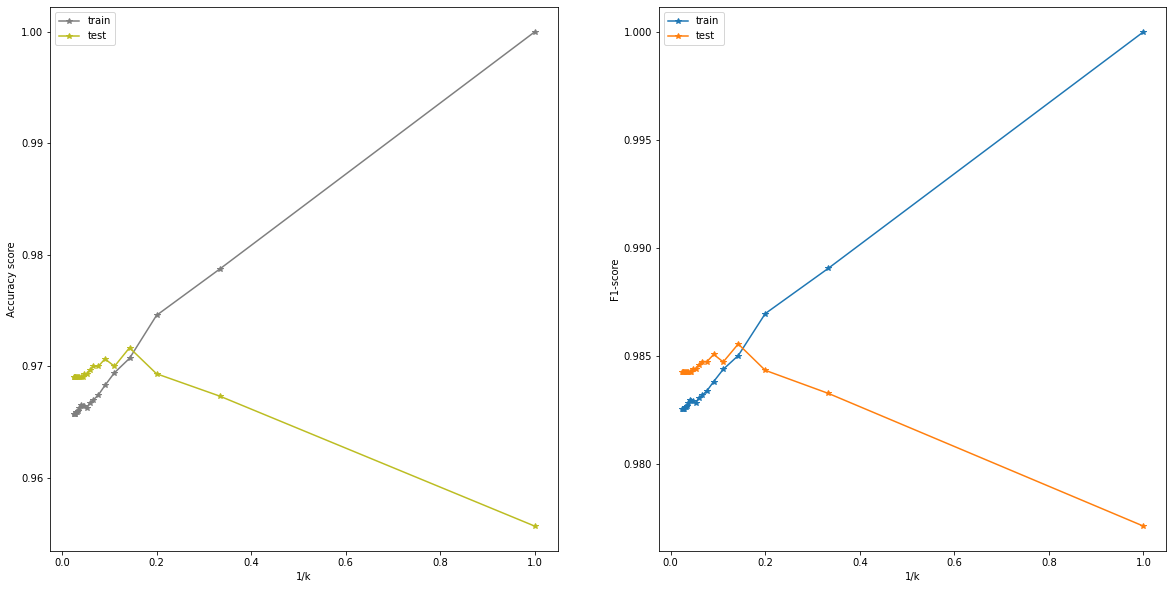

In [12]:
plt.subplots(1,2, figsize=(20, 10))
k = 1 / np.arange(1,43,2)

plt.subplot(1,2,1)
plt.plot(k, acc_train,c = '#7f7f7f', marker = '*', label='train')
plt.plot(k, acc_test,c = '#bcbd22', marker = '*', label='test')
plt.xlabel('1/k')
plt.ylabel('Accuracy score')
plt.legend()

plt.subplot(1,2,2)
plt.plot(k, f1_train, marker = '*', label='train')
plt.plot(k, f1_test, marker = '*', label='test')
plt.xlabel('1/k')
plt.ylabel('F1-score')
plt.legend()

* จากกราฟจะเห็นว่า ในกรณีที่ k = 1 ค่า accuracy ของ training จะมีค่า 100% เนื่องจากการนำจุดเดิมของ test set ซึ่งเป็นจุดเดียวกับ training set จึงทำให้ได้ accuracy 100%
* ค่า k ที่ควรเลือกคือ k = 7 ซึ่งเป็นจุดที่ได้ค่า accuracy ของ test set สูงที่สุด

In [63]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

#Naive Bayes

(array([1219., 1260., 1678., 1882., 1624., 1139.,  586.,  225.,   49.,
           5.]),
 array([   0.        ,  239.10077394,  478.20154787,  717.30232181,
         956.40309575, 1195.50386969, 1434.60464362, 1673.70541756,
        1912.8061915 , 2151.90696544, 2391.00773937]),
 <BarContainer object of 10 artists>)

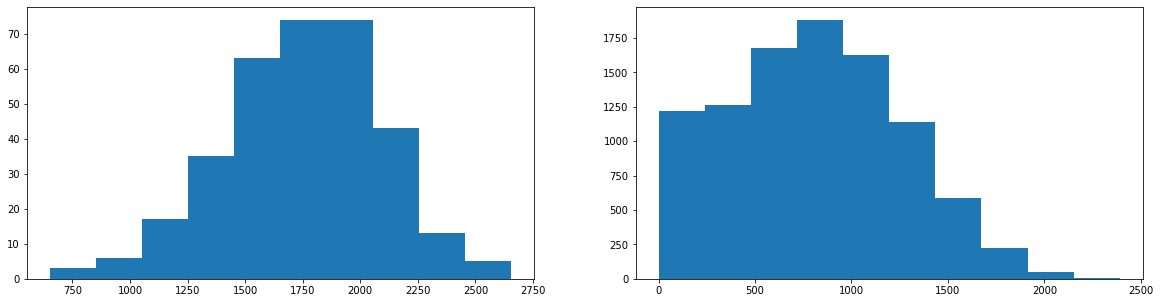

In [52]:
plt.subplots(1,2, figsize=(20, 5))

plt.subplot(1,2,1)
plt.hist(df_yes['balance'])

plt.subplot(1,2,2)
plt.hist(df_no['balance'])

(array([  44.,  805., 1799., 1210., 1624., 1933., 1425.,  634.,  159.,
          34.]),
 array([  771.96772939,  8050.19430597, 15328.42088255, 22606.64745913,
        29884.87403571, 37163.10061229, 44441.32718887, 51719.55376545,
        58997.78034204, 66276.00691862, 73554.2334952 ]),
 <BarContainer object of 10 artists>)

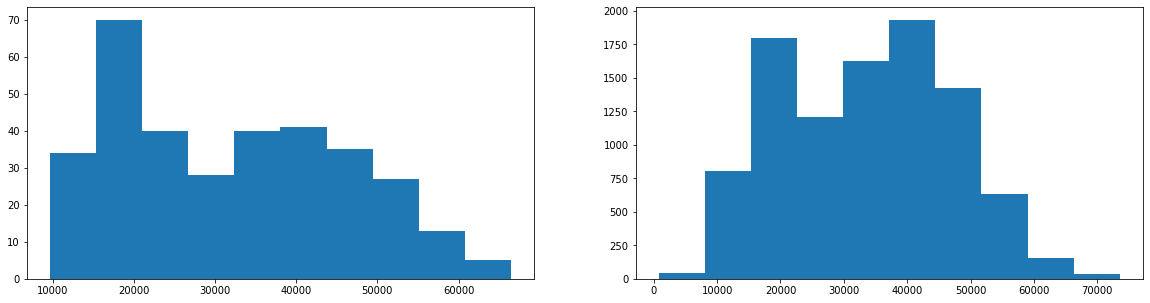

In [53]:
plt.subplots(1,2, figsize=(20, 5))

plt.subplot(1,2,1)
plt.hist(df_yes['income'])

plt.subplot(1,2,2)
plt.hist(df_no['income'])

In [ ]:
!pip install git+https://github.com/remykarem/mixed-naive-bayes#egg=mixed-naive-bayes

In [37]:
from mixed_naive_bayes import MixedNB

In [40]:
X_train = df_train[['student','balance', 'income']]
y_train = df_train['default']
X_test = df_test[['student','balance', 'income']]
y_test = df_test['default']

In [42]:
NB = MixedNB(categorical_features=[0])
NB.fit(X_train,y_train)
y_pred_test = NB.predict(X_test)
y_pred_train = NB.predict(X_train)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [49]:
def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

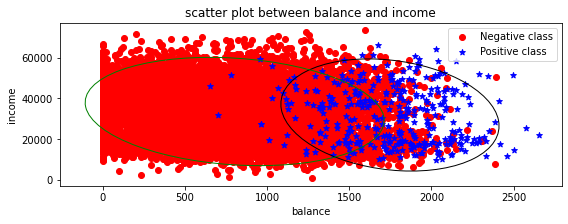

In [51]:
y_1_index = np.where(y_train == 1)
y_0_index = np.where(y_train == 0)
balance = np.array(df['balance'])
income = np.array(df['income'])
balance_1 = balance[y_1_index]
income_1 = income[y_1_index]
balance_0 = balance[y_0_index]
income_0 = income[y_0_index]

fig, axs = plt.subplots(1, 1, figsize=(9, 3))
df_no = df[df['default'] == 0]
df_yes = df[df['default'] == 1]
axs.scatter(df_no['balance'], df_no['income'], c = 'r', label='Negative class')
axs.scatter(df_yes['balance'], df_yes['income'], c = 'b', marker = '*',label='Positive class')
confidence_ellipse(balance_1, income_1, axs, edgecolor='k')
confidence_ellipse(balance_0, income_0, axs, edgecolor='g')
axs.set_xlabel('balance')
axs.set_ylabel('income')
axs.set_title('scatter plot between balance and income')
axs.legend()

#LDA

In [99]:
lda_all = LinearDiscriminantAnalysis()
lda_all.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [100]:
lda_2 = LinearDiscriminantAnalysis(store_covariance=True)
lda_2.fit(X_train[['balance', 'income']], y_train)
cov = lda_2.covariance_ # (1,1) = balance
cov_inv = np.linalg.inv(cov)
mean = lda_2.means_ # (1,1) = no, balance / (2,1) = yes, balance
prior = lda_2.priors_ # class 0 is in index 0

In [33]:
a, b = mean[0,:].T - mean[1,:].T
m = -(a*cov_inv[0,0]+b*cov_inv[0,1])/(a*cov_inv[1,0]+b*cov_inv[1,1])
C = (1/2 * (mean[0,:]@cov_inv@mean[0,:].T - (mean[1,:]@cov_inv@mean[1,:].T)) + np.log(prior[1]/prior[0]))/(a*cov_inv[1,0]+b*cov_inv[1,1])
xlist = np.linspace(1800, 2100)
ylist = m*xlist + C

<ipython-input-33-6531810ce3c6>:2: RuntimeWarning: invalid value encountered in double_scalars
  m = -(a*cov_inv[0,0]+b*cov_inv[0,1])/(a*cov_inv[1,0]+b*cov_inv[1,1])
<ipython-input-33-6531810ce3c6>:3: RuntimeWarning: divide by zero encountered in double_scalars
  C = (1/2 * (mean[0,:]@cov_inv@mean[0,:].T - (mean[1,:]@cov_inv@mean[1,:].T)) + np.log(prior[1]/prior[0]))/(a*cov_inv[1,0]+b*cov_inv[1,1])


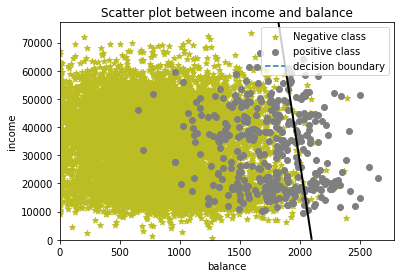

In [34]:
df_yes = df[df['default'] == 1]
df_no = df[df['default'] == 0]
plt.scatter(df_no['balance'], df_no['income'], c = '#bcbd22', marker='*', label='Negative class')
plt.scatter(df_yes['balance'], df_yes['income'], c = '#7f7f7f', label='positive class')
plt.xlabel('balance')
plt.ylabel('income')
plt.title('Scatter plot between income and balance')

nx, ny = 200, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(0, x_max, nx), np.linspace(0, y_max, ny))
a=pd.DataFrame(np.c_[xx.ravel(), yy.ravel()],columns=['balance','income'])
Z = lda_2.predict_proba(a)
Z = Z[:, 1].reshape(xx.shape)

plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="black")

plt.plot(xlist,ylist, linestyle='--', label='decision boundary')

plt.legend()

จาก assumption ของ LDA คือ $P(X|Y=k)$ มีการกระจายตัวแบบ gaussian และ $P(X|Y=1), P(X|Y=0)$ ทั้งสอง class มีค่า covariance เท่ากันแต่ค่า mean ไม่เท่ากัน จึงได้สมการ decision boundary เป็น 
$$ x^T\hat{\Sigma}^{-1}(\hat{μ_0}-\hat{μ_1}) = \frac{1}{2}(\hat{\mu_0}^T\hat{\Sigma}^{-1}\hat{\mu_0}-\hat{\mu_1}^T\hat{\Sigma}^{-1}\hat{\mu_1}) + log(\frac{\hat{π_1}}{\hat{π_0}}) $$

#QDA

In [65]:
qda_1 = QuadraticDiscriminantAnalysis()
qda_1.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [24]:
X_train = X_train[['balance', 'income']]
qda_2 = QuadraticDiscriminantAnalysis(store_covariance = True)
qda_2.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

<ipython-input-35-9a755b55841c>:17: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="black", label='decision boundary')


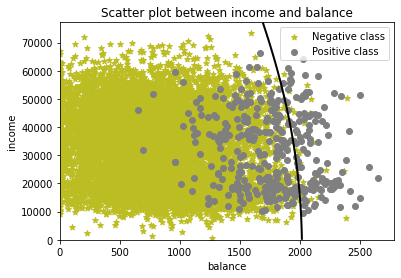

In [35]:
df_yes = df[df['default'] == 1]
df_no = df[df['default'] == 0]
plt.scatter(df_no['balance'], df_no['income'], c = '#bcbd22', marker='*', label='Negative class')
plt.scatter(df_yes['balance'], df_yes['income'], c = '#7f7f7f', label='Positive class')
plt.xlabel('balance')
plt.ylabel('income')
plt.title('Scatter plot between income and balance')

nx, ny = 200, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(0, x_max, nx), np.linspace(0, y_max, ny))
a=pd.DataFrame(np.c_[xx.ravel(), yy.ravel()],columns=['balance','income'])
Z = qda_2.predict_proba(a)
Z = Z[:, 1].reshape(xx.shape)

plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="black", label='decision boundary')
plt.legend()

# Summary

In [101]:
def result(x,y):
  result = pd.DataFrame(y)
  models = [log_reg_all, log_reg_2, knn, NB, lda_all, lda_2, qda_1, qda_2]
  for i in range (0,len(models)):
    if i == 0 :
      x_ = sm.add_constant(x)
      result['y_hat{}'.format(i+1)] = 1*(models[i].predict(x_)>=0.5)
    elif i == 1:
      x_ =  sm.add_constant(x.drop('student', axis=1))
      result['y_hat{}'.format(i+1)] = 1*(models[i].predict(x_)>=0.5)
    elif i == 2 or i==3 or i==4 or i == 6:
      result['y_hat{}'.format(i+1)] = models[i].predict(x)
    else:
      result['y_hat{}'.format(i+1)] = models[i].predict(x.drop('student', axis=1))
  return result
def score_table(result):
  models = ['Logistic (i)', 'Logistic (ii)', 'kNN', 'Naive Bayes', 'LDA (i)', 'LDA (ii)', 'QDA (i)', 'QDA (ii)']
  data = []
  for i in range(len(result.columns) -1):
    acc = 100*accuracy_score(result[result.columns[0]], result[result.columns[i+1]])
    recall = recall_score(result[result.columns[0]], result[result.columns[i+1]])
    precise = precision_score(result[result.columns[0]], result[result.columns[i+1]])
    f1 = f1_score(result[result.columns[0]], result[result.columns[i+1]])
    data.append({'model': models[i], 'accuracy': acc, 'recall': recall, 'precision': precise, 'f1': f1})
  return pd.DataFrame(data)

In [102]:
train_result = result(X_train, y_train)
test_result = result(X_test, y_test)

In [106]:
score_table(train_result)

,model,accuracy,recall,precision,f1
0,Logistic (i),97.214286,0.325000,0.702703,0.444444
1,Logistic (ii),97.185714,0.316667,0.697248,0.435530
2,kNN,97.071429,0.208333,0.769231,0.327869
3,Naive Bayes,96.928571,0.295833,0.606838,0.397759
4,LDA (i),97.171429,0.250000,0.769231,0.377358
5,LDA (ii),97.071429,0.241667,0.716049,0.361371
6,QDA (i),97.157143,0.291667,0.707071,0.412979
7,QDA (ii),97.242857,0.300000,0.742268,0.427300


In [105]:
score_table(test_result)

,model,accuracy,recall,precision,f1
0,Logistic (i),97.600000,0.344086,0.744186,0.470588
1,Logistic (ii),97.666667,0.344086,0.780488,0.477612
2,kNN,97.166667,0.139785,0.722222,0.234234
3,Naive Bayes,97.066667,0.290323,0.551020,0.380282
4,LDA (i),97.633333,0.290323,0.843750,0.432000
5,LDA (ii),97.633333,0.279570,0.866667,0.422764
6,QDA (i),97.700000,0.333333,0.815789,0.473282
7,QDA (ii),97.666667,0.333333,0.794872,0.469697
